# Prática Series Temporais com R

Estudo em séries temporais com análise e previsão de dados, utilizando as ferramentas do R. Este script faz uso de diversas abordagens, como decomposição de séries temporais, suavização exponencial e modelos ARIMA para prever os dados. 

In [2]:
# install.packages('forecast')
library(forecast)

options(repr.plot.width = 12, repr.plot.height = 6) # ajuste de plots no jupyter

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 



In [3]:
# dados
AirPassengers

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
1949,112,118,132,129,121,135,148,148,136,119,104,118
1950,115,126,141,135,125,149,170,170,158,133,114,140
1951,145,150,178,163,172,178,199,199,184,162,146,166
1952,171,180,193,181,183,218,230,242,209,191,172,194
1953,196,196,236,235,229,243,264,272,237,211,180,201
1954,204,188,235,227,234,264,302,293,259,229,203,229
1955,242,233,267,269,270,315,364,347,312,274,237,278
1956,284,277,317,313,318,374,413,405,355,306,271,306
1957,315,301,356,348,355,422,465,467,404,347,305,336
1958,340,318,362,348,363,435,491,505,404,359,310,337


In [7]:
start(AirPassengers)
end(AirPassengers)
frequency(AirPassengers)

[1] 1949    1

[1] 1960   12

[1] 12

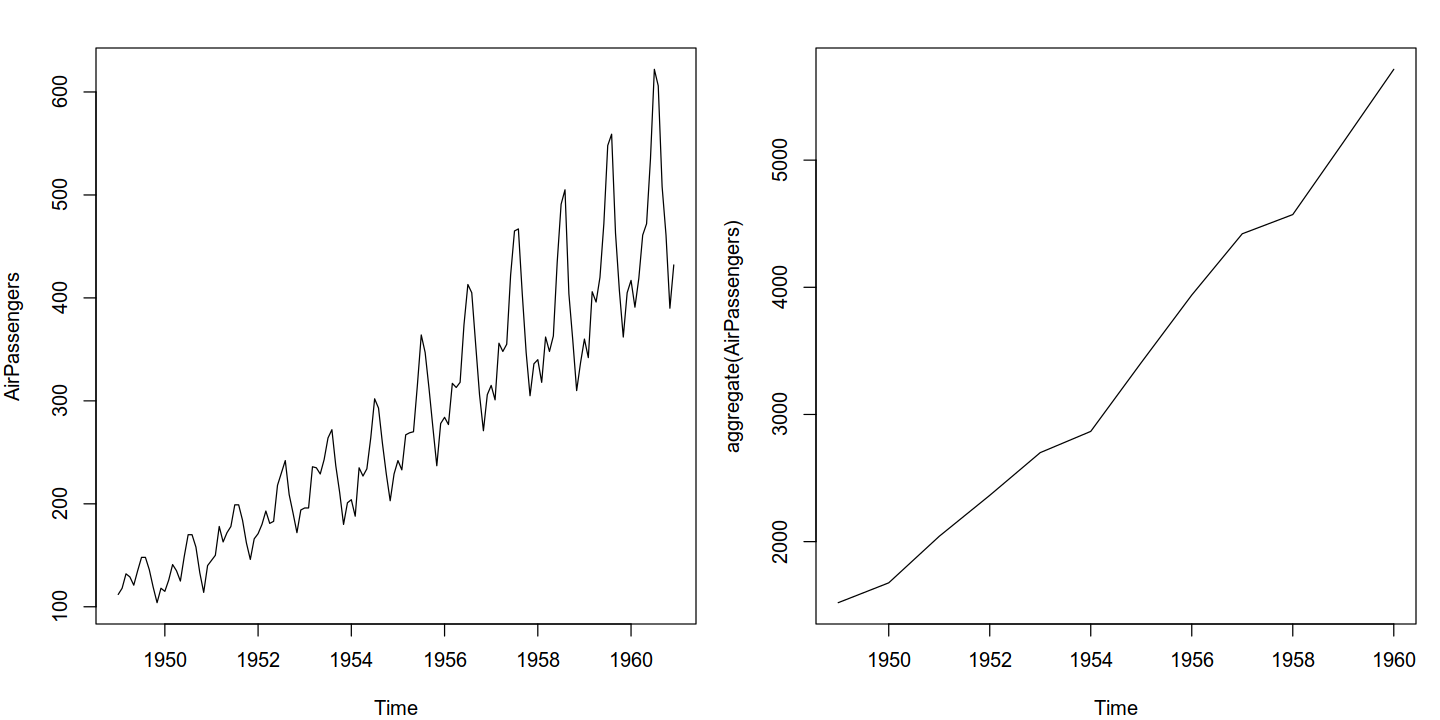

In [17]:
# visualizando os dados
par(mfrow = c(1, 2), mar = c(4, 4, 2, 1))  # ajuste 1l 2c e margens
plot(AirPassengers)
plot(aggregate(AirPassengers))

In [15]:
# janela
subst <- window(AirPassengers, start=c(1960,1), end=c(1960,12))
subst

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
1960,417,391,419,461,472,535,622,606,508,461,390,432


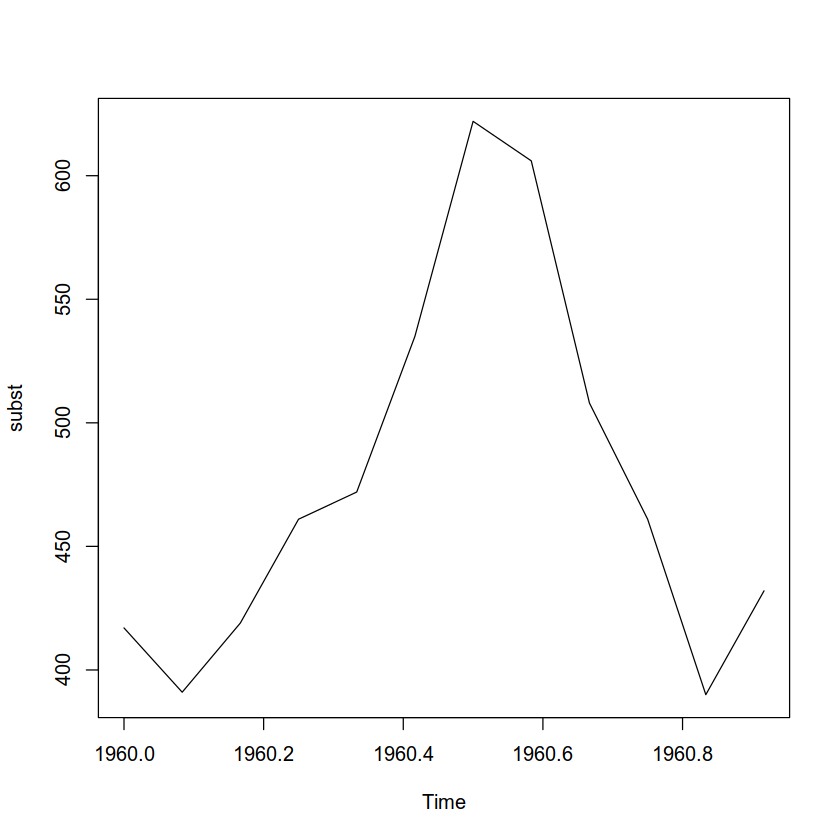

In [16]:
# visualizando a janela de dados
plot(subst)

In [18]:
# decomposicao
dec <- decompose(AirPassengers)
dec

$x
     Jan Feb Mar Apr May Jun Jul Aug Sep Oct Nov Dec
1949 112 118 132 129 121 135 148 148 136 119 104 118
1950 115 126 141 135 125 149 170 170 158 133 114 140
1951 145 150 178 163 172 178 199 199 184 162 146 166
1952 171 180 193 181 183 218 230 242 209 191 172 194
1953 196 196 236 235 229 243 264 272 237 211 180 201
1954 204 188 235 227 234 264 302 293 259 229 203 229
1955 242 233 267 269 270 315 364 347 312 274 237 278
1956 284 277 317 313 318 374 413 405 355 306 271 306
1957 315 301 356 348 355 422 465 467 404 347 305 336
1958 340 318 362 348 363 435 491 505 404 359 310 337
1959 360 342 406 396 420 472 548 559 463 407 362 405
1960 417 391 419 461 472 535 622 606 508 461 390 432

$seasonal
            Jan        Feb        Mar        Apr        May        Jun
1949 -24.748737 -36.188131  -2.241162  -8.036616  -4.506313  35.402778
1950 -24.748737 -36.188131  -2.241162  -8.036616  -4.506313  35.402778
1951 -24.748737 -36.188131  -2.241162  -8.036616  -4.506313  35.402778
1952 -24.7487

In [21]:
# atributos da decomposicao
attributes(dec)

$names
[1] "x"        "seasonal" "trend"    "random"   "figure"   "type"    

$class
[1] "decomposed.ts"

In [27]:
# acessando dados da decomposicao

## x
dec$x

## sazonalidade
dec$seasonal

## tendencia
dec$trend

## ...

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
1949,112,118,132,129,121,135,148,148,136,119,104,118
1950,115,126,141,135,125,149,170,170,158,133,114,140
1951,145,150,178,163,172,178,199,199,184,162,146,166
1952,171,180,193,181,183,218,230,242,209,191,172,194
1953,196,196,236,235,229,243,264,272,237,211,180,201
1954,204,188,235,227,234,264,302,293,259,229,203,229
1955,242,233,267,269,270,315,364,347,312,274,237,278
1956,284,277,317,313,318,374,413,405,355,306,271,306
1957,315,301,356,348,355,422,465,467,404,347,305,336
1958,340,318,362,348,363,435,491,505,404,359,310,337


,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
1949,-24.748737,-36.188131,-2.241162,-8.036616,-4.506313,35.402778,63.830808,62.823232,16.520202,-20.642677,-53.593434,-28.619949
1950,-24.748737,-36.188131,-2.241162,-8.036616,-4.506313,35.402778,63.830808,62.823232,16.520202,-20.642677,-53.593434,-28.619949
1951,-24.748737,-36.188131,-2.241162,-8.036616,-4.506313,35.402778,63.830808,62.823232,16.520202,-20.642677,-53.593434,-28.619949
1952,-24.748737,-36.188131,-2.241162,-8.036616,-4.506313,35.402778,63.830808,62.823232,16.520202,-20.642677,-53.593434,-28.619949
1953,-24.748737,-36.188131,-2.241162,-8.036616,-4.506313,35.402778,63.830808,62.823232,16.520202,-20.642677,-53.593434,-28.619949
1954,-24.748737,-36.188131,-2.241162,-8.036616,-4.506313,35.402778,63.830808,62.823232,16.520202,-20.642677,-53.593434,-28.619949
1955,-24.748737,-36.188131,-2.241162,-8.036616,-4.506313,35.402778,63.830808,62.823232,16.520202,-20.642677,-53.593434,-28.619949
1956,-24.748737,-36.188131,-2.241162,-8.036616,-4.506313,35.402778,63.830808,62.823232,16.520202,-20.642677,-53.593434,-28.619949
1957,-24.748737,-36.188131,-2.241162,-8.036616,-4.506313,35.402778,63.830808,62.823232,16.520202,-20.642677,-53.593434,-28.619949
1958,-24.748737,-36.188131,-2.241162,-8.036616,-4.506313,35.402778,63.830808,62.823232,16.520202,-20.642677,-53.593434,-28.619949


,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
1949,NA,NA,NA,NA,NA,NA,126.7917,127.2500,127.9583,128.5833,129.0000,129.7500
1950,131.2500,133.0833,134.9167,136.4167,137.4167,138.7500,140.9167,143.1667,145.7083,148.4167,151.5417,154.7083
1951,157.1250,159.5417,161.8333,164.1250,166.6667,169.0833,171.2500,173.5833,175.4583,176.8333,178.0417,180.1667
1952,183.1250,186.2083,189.0417,191.2917,193.5833,195.8333,198.0417,199.7500,202.2083,206.2500,210.4167,213.3750
1953,215.8333,218.5000,220.9167,222.9167,224.0833,224.7083,225.3333,225.3333,224.9583,224.5833,224.4583,225.5417
1954,228.0000,230.4583,232.2500,233.9167,235.6250,237.7500,240.5000,243.9583,247.1667,250.2500,253.5000,257.1250
1955,261.8333,266.6667,271.1250,275.2083,278.5000,281.9583,285.7500,289.3333,293.2500,297.1667,301.0000,305.4583
1956,309.9583,314.4167,318.6250,321.7500,324.5000,327.0833,329.5417,331.8333,334.4583,337.5417,340.5417,344.0833
1957,348.2500,353.0000,357.6250,361.3750,364.5000,367.1667,369.4583,371.2083,372.1667,372.4167,372.7500,373.6250
1958,375.2500,377.9167,379.5000,380.0000,380.7083,380.9583,381.8333,383.6667,386.5000,390.3333,394.7083,398.6250


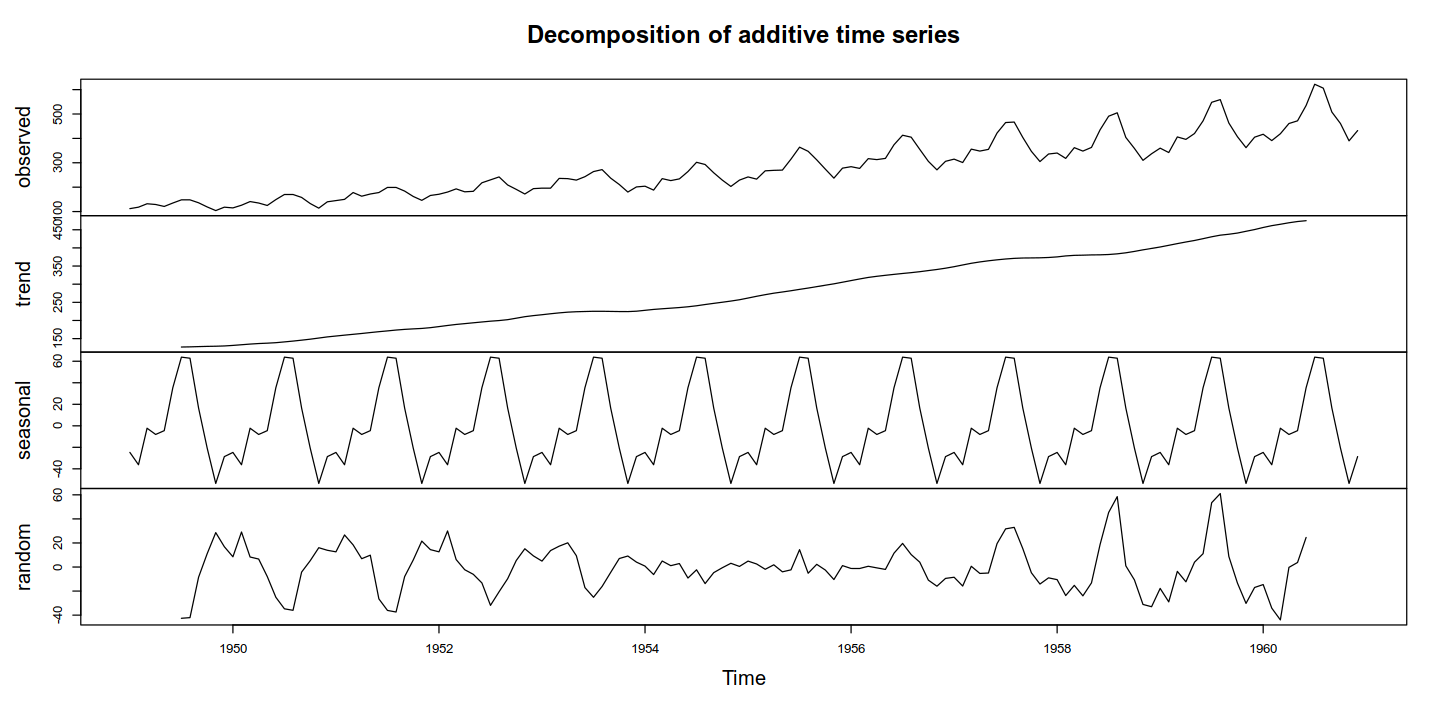

In [28]:
# visualizando os dados da decomposicao
plot(dec)

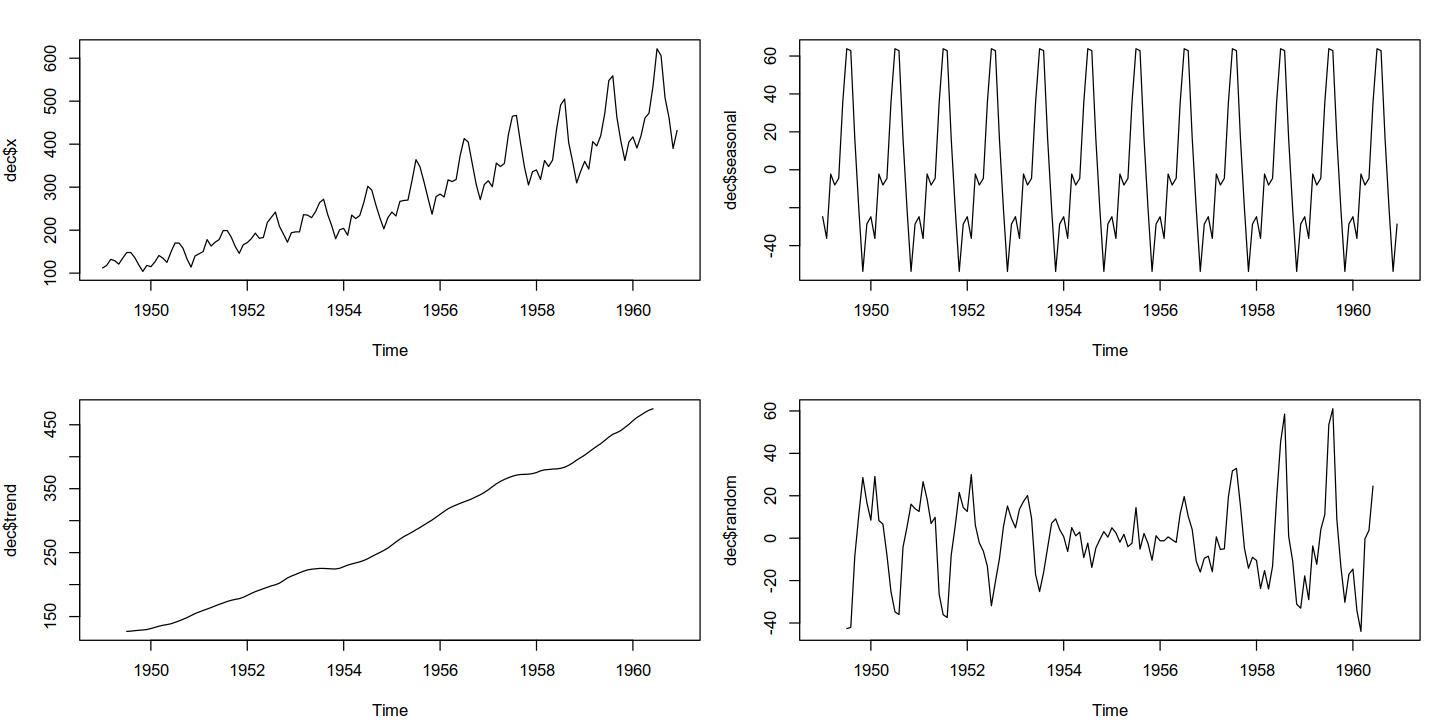

In [37]:
# visualizando elementos da decomposicao
par(mfrow=c(2,2), mar=c(4,4,2,1))
plot(dec$x)
plot(dec$seasonal)
plot(dec$trend)
plot(dec$random)

In [38]:
# suavizacao exponencial ETS
ets <- ets(AirPassengers)
ets

ETS(M,Ad,M) 

Call:
ets(y = AirPassengers)

  Smoothing parameters:
    alpha = 0.7096 
    beta  = 0.0204 
    gamma = 1e-04 
    phi   = 0.98 

  Initial states:
    l = 120.9939 
    b = 1.7705 
    s = 0.8944 0.7993 0.9217 1.0592 1.2203 1.2318
           1.1105 0.9786 0.9804 1.011 0.8869 0.9059

  sigma:  0.0392

     AIC     AICc      BIC 
1395.166 1400.638 1448.623 

In [39]:
# previsao com ets
previsao <- forecast(ets, h=12)
previsao

         Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
Jan 1961       441.8018 419.6256 463.9780 407.8863 475.7174
Feb 1961       434.1186 407.1668 461.0704 392.8994 475.3379
Mar 1961       496.6300 460.6291 532.6310 441.5714 551.6887
Apr 1961       483.2375 443.6210 522.8539 422.6493 543.8256
May 1961       483.9914 440.0236 527.9591 416.7484 551.2343
Jun 1961       551.0244 496.3368 605.7120 467.3869 634.6619
Jul 1961       613.1797 547.3865 678.9728 512.5577 713.8016
Aug 1961       609.3648 539.2447 679.4850 502.1253 716.6044
Sep 1961       530.5408 465.4872 595.5944 431.0500 630.0317
Oct 1961       463.0332 402.8496 523.2168 370.9904 555.0761
Nov 1961       402.7478 347.4995 457.9961 318.2528 487.2428
Dec 1961       451.9694 386.7750 517.1638 352.2631 551.6756

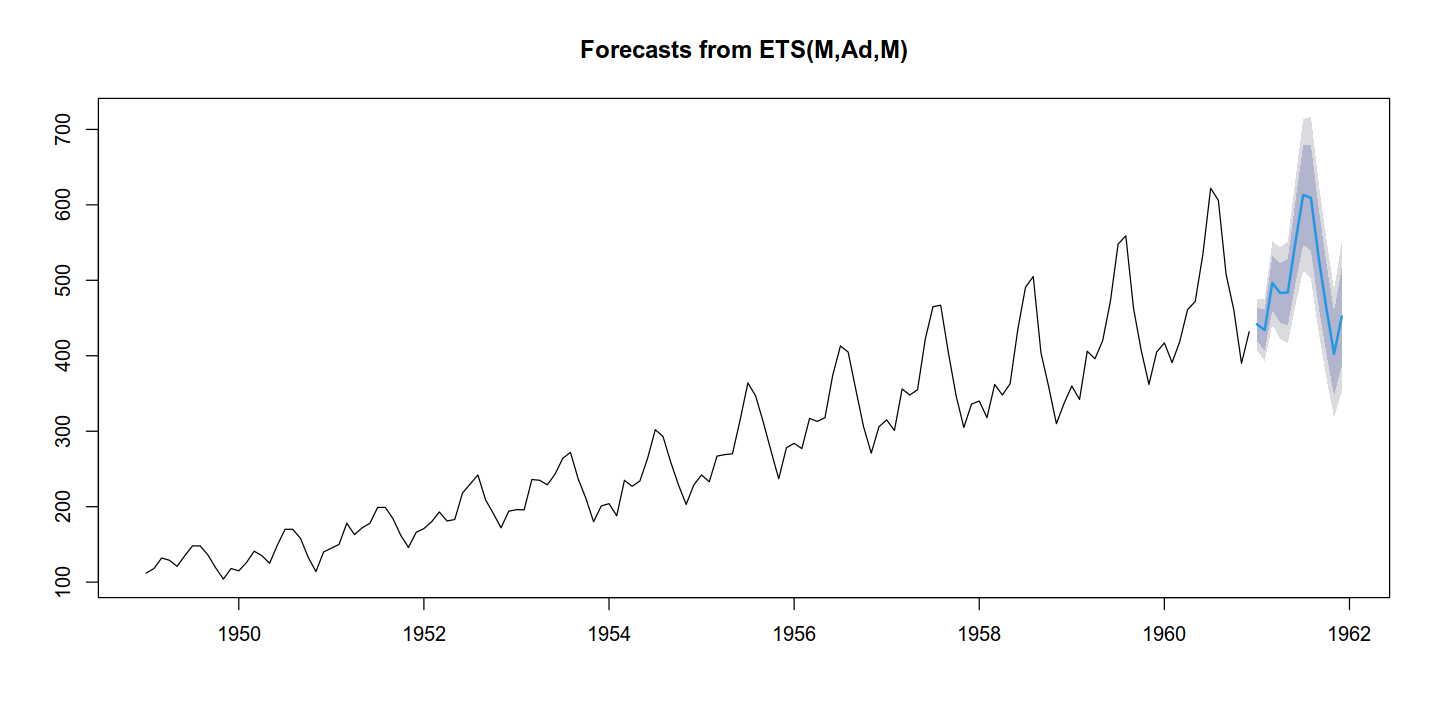

In [40]:
# visualizando previsao
plot(previsao)

In [41]:
# arima
arima = auto.arima(AirPassengers)
arima

Series: AirPassengers 
ARIMA(2,1,1)(0,1,0)[12] 

Coefficients:
         ar1     ar2      ma1
      0.5960  0.2143  -0.9819
s.e.  0.0888  0.0880   0.0292

sigma^2 = 132.3:  log likelihood = -504.92
AIC=1017.85   AICc=1018.17   BIC=1029.35

In [42]:
# previsao arima
previsao_arima = forecast(arima, h=12)
previsao_arima

         Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
Jan 1961       445.6349 430.8903 460.3795 423.0851 468.1847
Feb 1961       420.3950 403.0907 437.6993 393.9304 446.8596
Mar 1961       449.1983 429.7726 468.6241 419.4892 478.9074
Apr 1961       491.8399 471.0270 512.6529 460.0092 523.6707
May 1961       503.3945 481.5559 525.2330 469.9953 536.7937
Jun 1961       566.8625 544.2637 589.4612 532.3007 601.4242
Jul 1961       654.2602 631.0820 677.4384 618.8122 689.7081
Aug 1961       638.5975 614.9704 662.2246 602.4630 674.7320
Sep 1961       540.8837 516.9028 564.8647 504.2081 577.5594
Oct 1961       494.1266 469.8624 518.3909 457.0177 531.2356
Nov 1961       423.3327 398.8381 447.8273 385.8715 460.7940
Dec 1961       465.5076 440.8229 490.1923 427.7556 503.2596

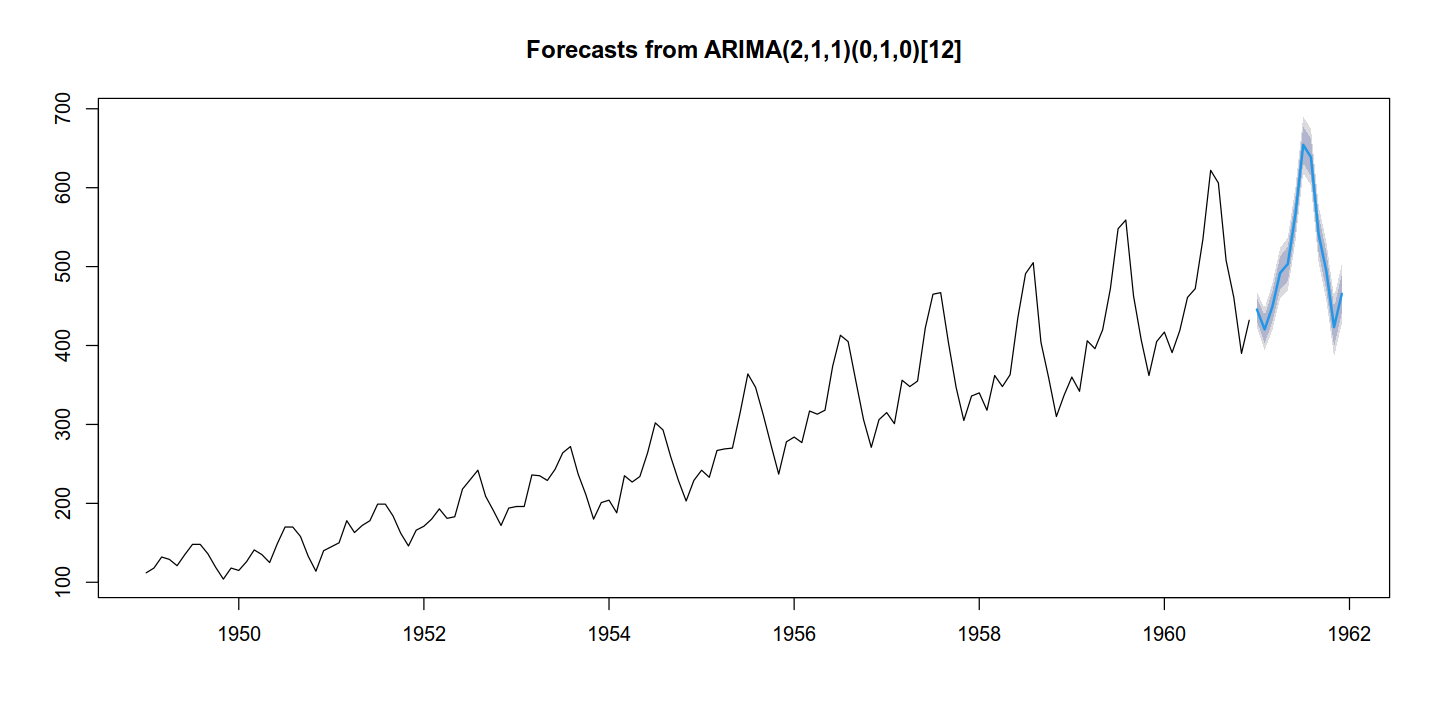

In [43]:
# visualizando previsao com arima
plot(previsao_arima)